# Statistical summaries

## Revealing uncertainty

- Discrete x, range: `geom_errorbar()`, `geom_linerange()`
- Discrete x, range & center: `geom_crossbar()`, `geom_pointrange()`
- Continuous x, range: `geom_ribbon()`
- Continuous x, range & center: `geom_smooth(stat = "identity")`

In [1]:
library(ggplot2)
library(repr)
options(repr.plot.width=3, repr.plot.height=2, repr.plot.res=180)

# multiplot function from Cookbook for R by Winston Chang
# modified by Yuanxing Cheng
# http://www.cookbook-r.com/Graphs/Multiple_graphs_on_one_page_(ggplot2)/
multiplot <- function(..., plotlist=NULL, file, ncol=1, layout=NULL, res=180) {
    library(grid)

    # Make a list from the ... arguments and plotlist
    plots <- c(list(...), plotlist)

    numPlots = length(plots)
    options(repr.plot.width=min(9,3*ncol), repr.plot.height=2*max(numPlots%/%ncol,1), repr.plot.res=res)

    # If layout is NULL, then use 'ncol' to determine layout
    if (is.null(layout)) {
        # Make the panel
        # ncol: Number of columns of plots
        # nrow: Number of rows needed, calculated from # of column
        layout <- matrix(
            seq(1, ncol * ceiling(numPlots/ncol)),
            ncol = ncol, nrow = ceiling(numPlots/ncol),
            byrow=TRUE # set byrow=TRUE will make the subplots listed by row
        )
    }

    if (numPlots==1) {
        print(plots[[1]])
    } else {
        # Set up the page
        grid.newpage()
        pushViewport(viewport(layout = grid.layout(nrow(layout), ncol(layout))))

        # Make each plot, in the correct location
        for (i in 1:numPlots) {
            # Get the i,j matrix positions of the regions that contain this subplot
            matchidx <- as.data.frame(which(layout == i, arr.ind = TRUE))
            print(
                plots[[i]],
                vp = viewport(
                    layout.pos.row = matchidx$row,
                    layout.pos.col = matchidx$col
                )
            )
        }
    }
}
myTheme = theme(
    plot.title = element_text(size = rel(0.5)), 
    axis.title = element_text(size = rel(0.8)), 
    legend.title = element_text(size = rel(0.8)))

Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang


x,y,se
1,18,1.2
2,11,0.5
3,16,1.0


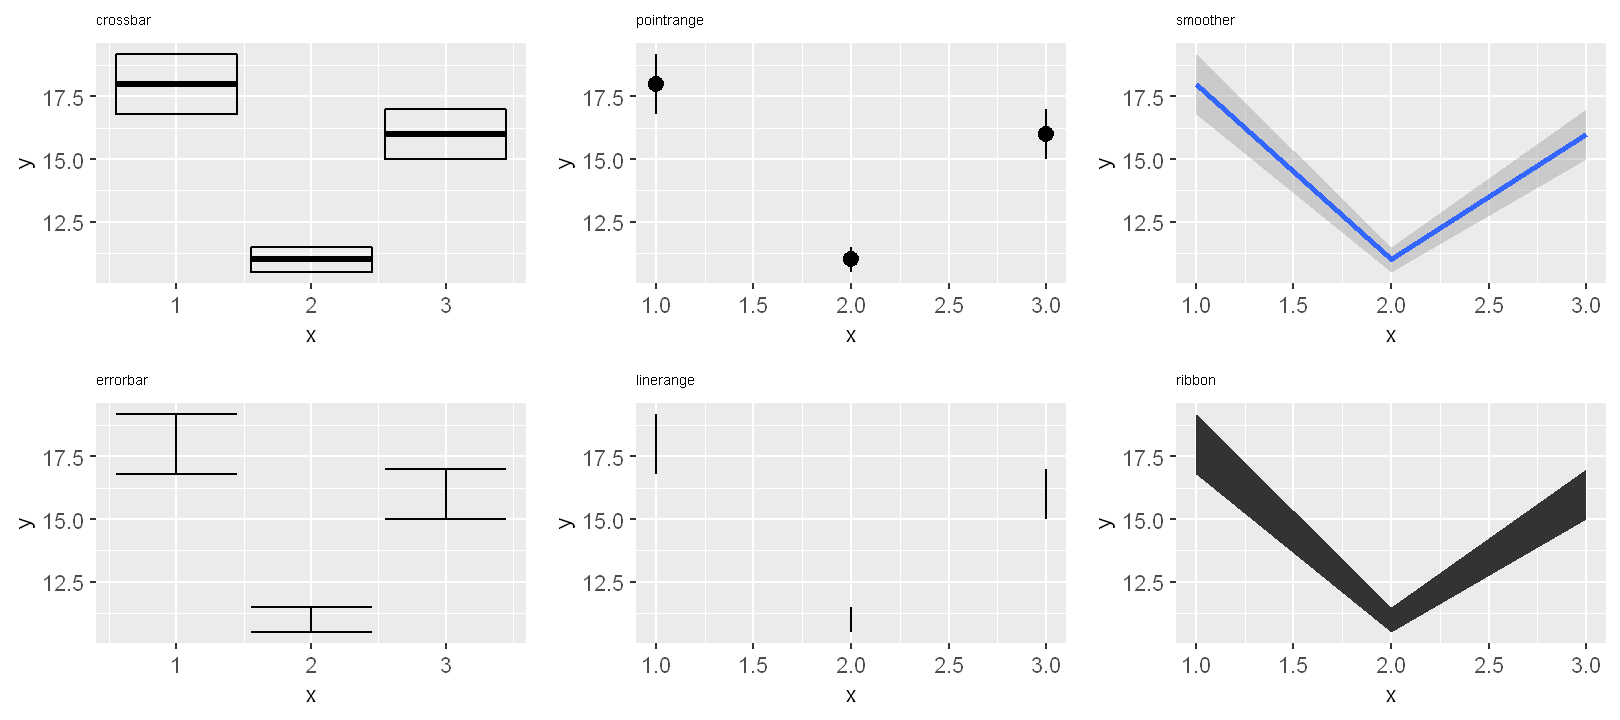

In [2]:
y <- c(18, 11, 16)
df <- data.frame(x = 1:3, y = y, se = c(1.2, 0.5, 1.0))
df

base <- ggplot(df, aes(x, y, ymin = y - se, ymax = y + se)) + myTheme
p1 <- base + geom_crossbar() + ggtitle('crossbar')
p2 <- base + geom_pointrange() + ggtitle('pointrange')
p3 <- base + geom_smooth(stat = "identity") + ggtitle("smoother")
p4 <- base + geom_errorbar() + ggtitle("errorbar")
p5 <- base + geom_linerange() + ggtitle("linerange")
p6 <- base + geom_ribbon() + ggtitle("ribbon")
multiplot(p1,p2,p3,p4,p5,p6,ncol=3)

These plots use `ymin=y-se` and `ymax=y+se` as the confidence intervals.

## Weighted data

use `midwest` dataset

### Simple geoms

Like `geom_point()` and `geom_line()`

In [3]:
head(midwest)

PID,county,state,area,poptotal,popdensity,popwhite,popblack,popamerindian,popasian,...,percollege,percprof,poppovertyknown,percpovertyknown,percbelowpoverty,percchildbelowpovert,percadultpoverty,percelderlypoverty,inmetro,category
561,ADAMS,IL,0.052,66090,1270.9615,63917,1702,98,249,...,19.63139,4.355859,63628,96.27478,13.151443,18.01172,11.009776,12.443812,0,AAR
562,ALEXANDER,IL,0.014,10626,759.0000,7054,3496,19,48,...,11.24331,2.870315,10529,99.08714,32.244278,45.82651,27.385647,25.228976,0,LHR
563,BOND,IL,0.022,14991,681.4091,14477,429,35,16,...,17.03382,4.488572,14235,94.95697,12.068844,14.03606,10.852090,12.697410,0,AAR
564,BOONE,IL,0.017,30806,1812.1176,29344,127,46,150,...,17.27895,4.197800,30337,98.47757,7.209019,11.17954,5.536013,6.217047,1,ALU
565,BROWN,IL,0.018,5836,324.2222,5264,547,14,5,...,14.47600,3.367680,4815,82.50514,13.520249,13.02289,11.143211,19.200000,0,AAR
566,BUREAU,IL,0.050,35688,713.7600,35157,50,65,195,...,18.90462,3.275891,35107,98.37200,10.399635,14.15882,8.179287,11.008586,0,AAR


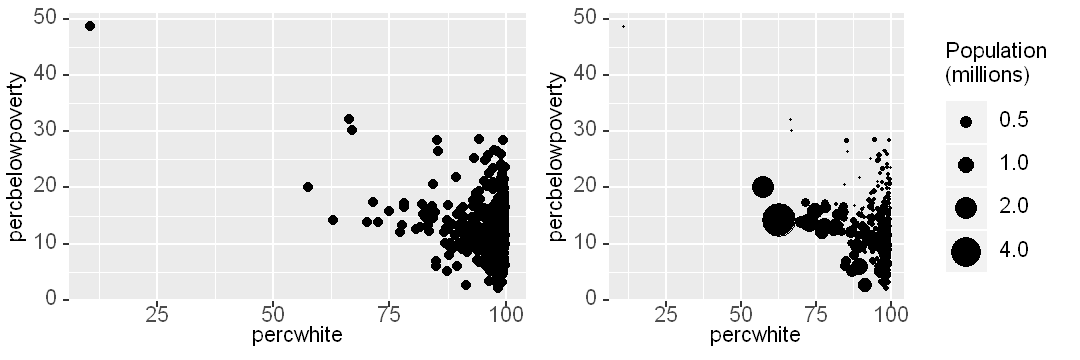

In [4]:
# Unweighted
p1 <- ggplot(midwest, aes(percwhite, percbelowpoverty)) + 
geom_point() + myTheme

# Weight by population
p2 <- ggplot(midwest, aes(percwhite, percbelowpoverty)) + 
geom_point(aes(size = poptotal / 1e6)) + 
scale_size_area("Population\n(millions)", breaks = c(0.5, 1, 2, 4)) + myTheme

multiplot(p1,p2,ncol=2)

we mannually weight the data and indicate using `size`

`scale_size_area()` can set the scale, like we did in `theme()`.

### Complicated geoms

`geom_smooth()`, `geom_histogram()` and so on

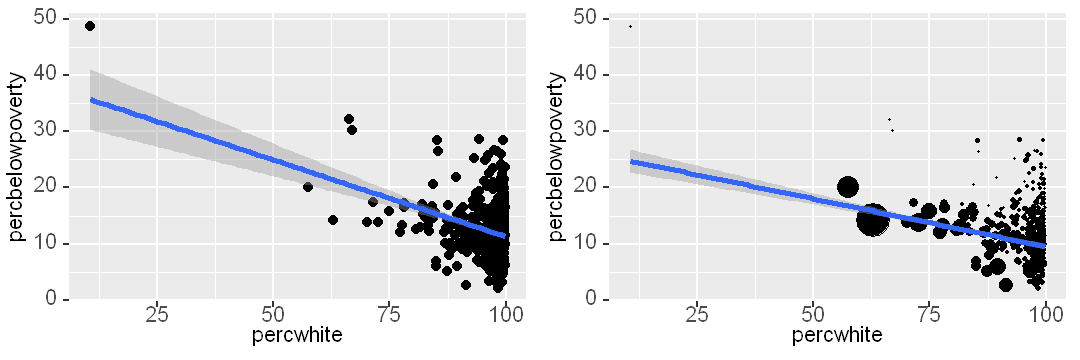

In [5]:
p1 <- ggplot(midwest, aes(percwhite, percbelowpoverty)) + 
geom_point() + 
geom_smooth(method = lm, size = 1) + myTheme

# Weighted by population
p2 <- ggplot(midwest, aes(percwhite, percbelowpoverty)) + 
geom_point(aes(size = poptotal / 1e6)) + 
geom_smooth(aes(weight = poptotal), method = lm, size = 1) + myTheme + 
scale_size_area(guide = "none")

multiplot(p1,p2,ncol=2)

we assign `aes(weight = poptotal)` in `geom_smooth()` so that the smoother uses the weighted number to calculate.

`scale_size_area(guide = "none")` will hide the scale.
 
 About histogram, 

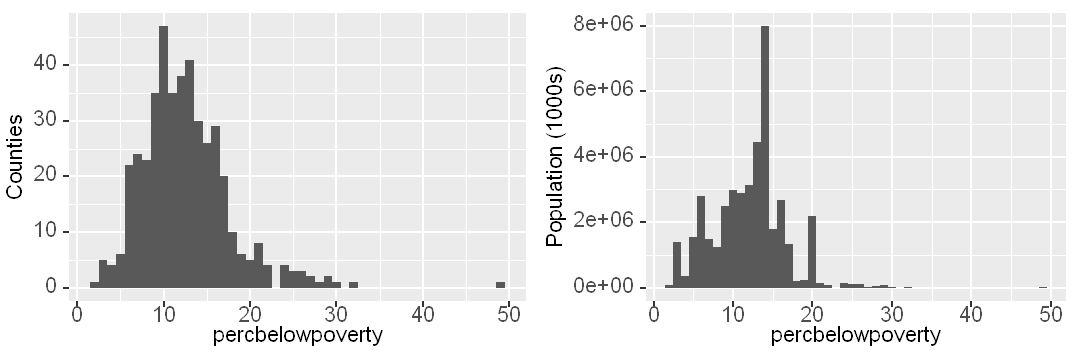

In [6]:
p1 <- ggplot(midwest, aes(percbelowpoverty)) +
geom_histogram(binwidth = 1) + 
ylab("Counties") + myTheme

p2 <- ggplot(midwest, aes(percbelowpoverty)) +
geom_histogram(aes(weight = poptotal), binwidth = 1) +
ylab("Population (1000s)") + myTheme

multiplot(p1,p2,ncol=2)

## Diamonds data

Large dataset, e.g., `diamonds`. We need special tools to deal with it

In [7]:
head(diamonds)

carat,cut,color,clarity,depth,table,price,x,y,z
0.23,Ideal,E,SI2,61.5,55,326,3.95,3.98,2.43
0.21,Premium,E,SI1,59.8,61,326,3.89,3.84,2.31
0.23,Good,E,VS1,56.9,65,327,4.05,4.07,2.31
0.29,Premium,I,VS2,62.4,58,334,4.20,4.23,2.63
0.31,Good,J,SI2,63.3,58,335,4.34,4.35,2.75
0.24,Very Good,J,VVS2,62.8,57,336,3.94,3.96,2.48


### Displaying distributions

1d continuous: `geom_histogram()`

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
Warning message:
"Removed 45 rows containing non-finite values (stat_bin)."Warning message:
"Removed 2 rows containing missing values (geom_bar)."

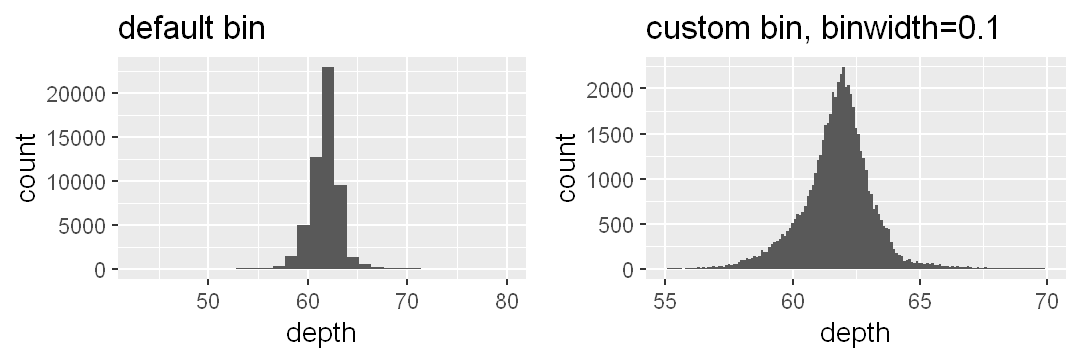

In [8]:
p1 <- ggplot(diamonds, aes(depth)) + 
geom_histogram() + ggtitle("default bin")

p2 <- ggplot(diamonds, aes(depth)) + 
geom_histogram(binwidth = 0.1) + 
xlim(55, 70) + ggtitle("custom bin, binwidth=0.1")

multiplot(p1,p2,ncol=2)

To compare between groups:

- `facet_wrap(~ colName)`, see Chap02
- `geom_freqpoly()` with `color=colName`
- `geom_histogram(position = "fill")`, also called the **conditional density plot**, equal to `geom_histogram(position = position_fill())`

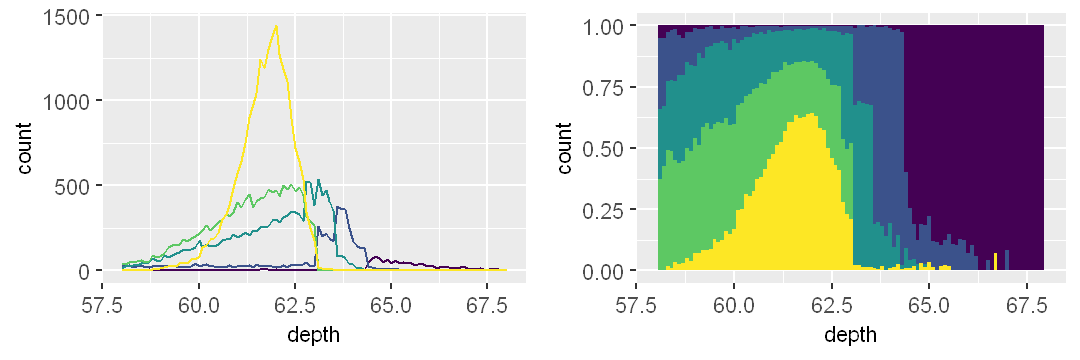

In [12]:
p1 <- ggplot(diamonds, aes(depth)) + 
geom_freqpoly(aes(colour = cut), binwidth = 0.1, na.rm = TRUE) +
xlim(58, 68) + 
theme(legend.position = "none") + myTheme
p2 <- ggplot(diamonds, aes(depth)) + 
geom_histogram(aes(fill = cut), binwidth = 0.1, position = "fill", na.rm = TRUE) +
xlim(58, 68) + 
theme(legend.position = "none") + myTheme

multiplot(p1,p2,ncol=2)

`geom_histogram(position = "fill")` will stack each bin, and scale it to the same height and resize to $1$.

Here `na.rm = TRUE` means NA values are removed.

Another thing to mention, `stat = "identity"` is used when we draw `geom_bar()` in Chap02. However, this can be an underlying statistics here in histogram and frequency polygon geom where it's assigned to be `stat = "bin"`.

This `stat = 'bin'` will produce two output:
- `count`, the counted number
- `density`, `count` divided by the total count multiplied by the bin width.

By default `count` is the y-value. To plot the `density`, you can either let `stat='density'` or use `geom_density()`

Warning message:
"Ignoring unknown parameters: binwidth"

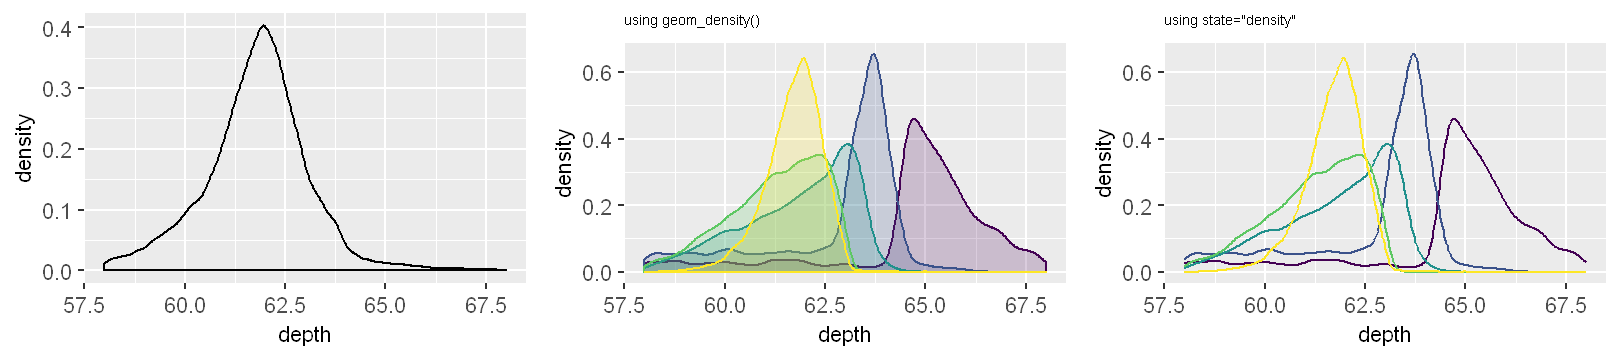

In [44]:
p1 <- ggplot(diamonds, aes(depth)) +
geom_density(na.rm = TRUE) + 
xlim(58, 68) + 
theme(legend.position = "none") + myTheme
p2 <- ggplot(diamonds, aes(depth, fill = cut, colour = cut)) +
geom_density(alpha = 0.2, na.rm = TRUE) + 
xlim(58, 68) + 
theme(legend.position = "none") + myTheme + ggtitle('using geom_density()')
p3 <- ggplot(diamonds, aes(depth, fill = cut, colour = cut)) + 
geom_freqpoly(aes(fill = cut), binwidth = 0.1, na.rm = TRUE, stat = 'density') +
xlim(58, 68) + 
theme(legend.position = "none") + myTheme + ggtitle('using state="density"')

multiplot(p1,p2,p3,ncol=3)

Note that the area of each density estimate is standardised to one so that you lose information about the relative size of each group.